In [543]:
import pandas as pd
pd.options.plotting.backend = "plotly"
import plotly.express as px
import matplotlib.pyplot as plt

import mysql.connector

# connect to mysql database

mydb = mysql.connector.connect(
    user='root',
    password='Porsche911',
    host='127.0.0.1',
    database='Toronto_Starbucks_Effect',
)

In [544]:
# show starbucks_stores table

query = "SELECT * FROM ward_starbucks"

df = pd.read_sql(query, mydb)

bar_chart = px.bar(df, x="ward_id",  y="num_starbucks_stores")
bar_chart.show()

/var/folders/jm/v10mymh16t92y4plqpb0x81w0000gn/T/ipykernel_22852/3043363921.py:5: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



<br />
<hr />

### The above bar chart reveals a blarring disproportionality in the number of Starbucks found across the 25 wards.

This graph displays irrefutable bias in Starbucks' location strategy for opening store in Toronto's more affluent downtown-core/midtown areas including:

    - Ward 10: Spadina-Fort York,
    - Ward 11: University-Rosedale,
    - Ward 12: Toronto-St.Paul's,
    - Ward 13: Toronto Centre

Wards 3 and 8 are found to be outliers as if they're taken out of the input dataframe, the graph fits a near-perfect symmetric distribution.

<hr />
<br />

In [545]:
query = """
        SELECT
            SUM(num_starbucks_stores) as total
        FROM
            ward_starbucks;
        """
total_stores = pd.read_sql(query, mydb).total[0]

query = """
        SELECT
            SUM(num_starbucks_stores) as total
        FROM
            ward_starbucks
        WHERE
            ward_id in(3, 8, 10, 11, 12, 13);
        """
target_ward_stores = pd.read_sql(query, mydb).total[0]

percent = target_ward_stores/total_stores

print(target_ward_stores, '/', total_stores, " == ", round(percent * 100, 2), "%", ' of all Toronto Starbucks are but in 4 downtown wards.')

134.0 / 185.0  ==  72.43 %  of all Toronto Starbucks are but in 4 downtown wards.


/var/folders/jm/v10mymh16t92y4plqpb0x81w0000gn/T/ipykernel_22852/2188934546.py:7: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.

/var/folders/jm/v10mymh16t92y4plqpb0x81w0000gn/T/ipykernel_22852/2188934546.py:17: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



<br />
<hr />

#### There are 185 Starbucks in Toronto -- <u>134 stores</u> (72.43%) are located but in 6 wards.
- 4 of the 6 wards, (wards 10-13), are the <em>smallest</em> among Toronto's 25 wards.
    - these four wards join together to form a 'downtown strip' so-to-speak (see below map).

<hr />
<br />

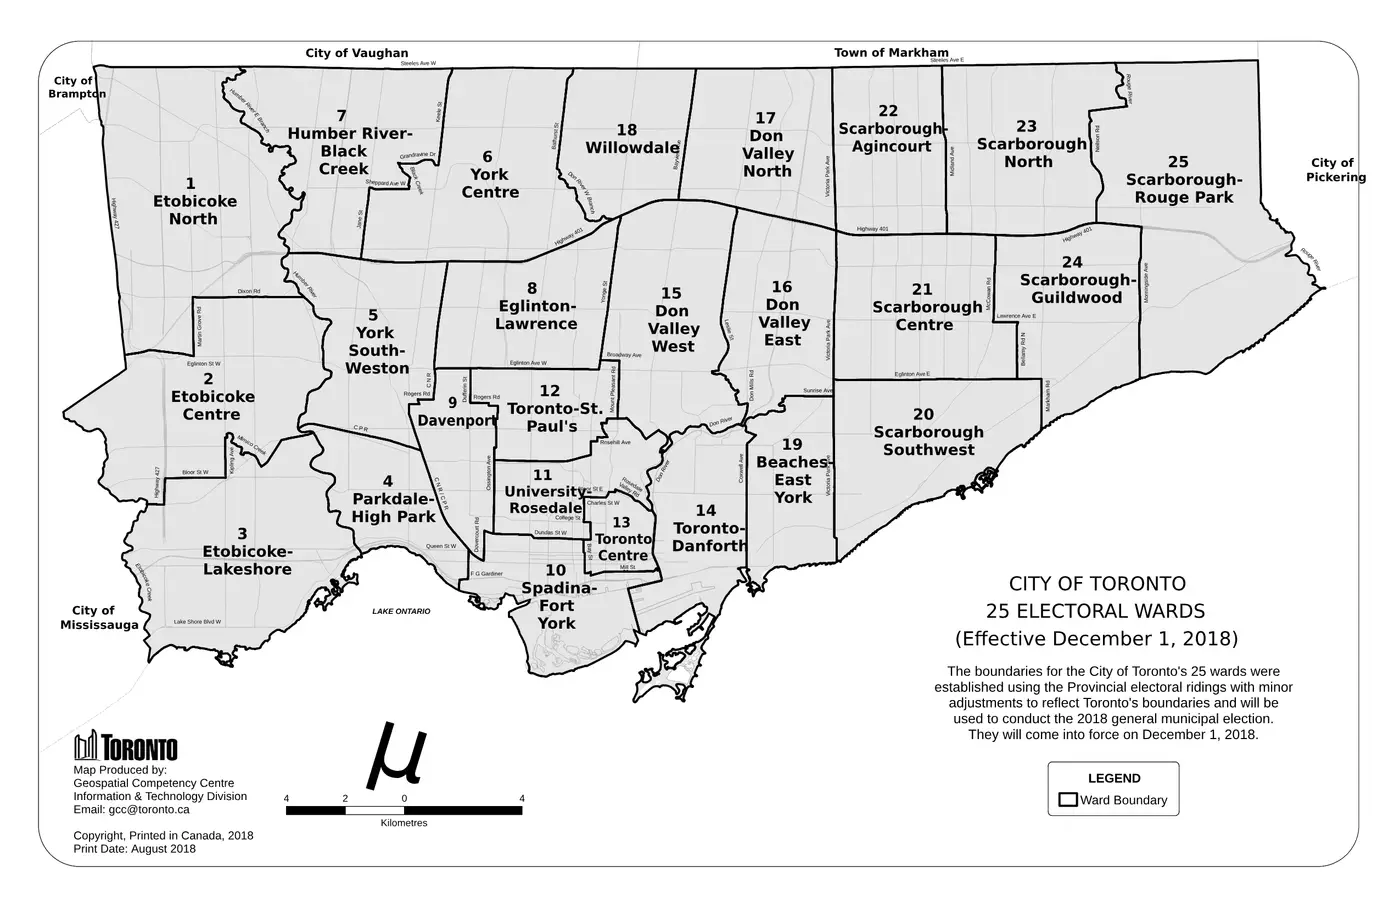

Toronto's 25 Ward Model is easier to interpret than its predecessor, the 47 Ward Model.

Simple trick: Ward 1 (Etobicoke North) starts on the TOP LEFT, then keep snake-counting your way to lakefront and Vaughan/Markham divider until you reach Ward 25 (Scarborough-Rouge Park).

<hr />
<br />

#### Let's take a closer look at what's different in these six wards...
<hr />
<br />

# 1. <u>`Education`</u>

In [546]:
# analyze education level of target wards with pie graph

query = """
        SELECT ward_id, bachelors_and_above FROM ward_education;
        """

df = pd.read_sql(query, mydb)

pie_chart = px.pie(df,
                names='ward_id',
                values='bachelors_and_above',
                title='# People w. Bachelors or above by Ward',
                template='gridon'
                )

# I could've code-golf'ed this so hard with a list comprehension; but I chose the higher path of readable code
pull_arr = []
for i in range(1, 26):
    pull_arr.append(0.5 if i in [3, 8, 10, 11, 12, 13] else 0)

pie_chart.update_traces(textposition='inside', textinfo='percent+label', pull=pull_arr)
pie_chart.show()

/var/folders/jm/v10mymh16t92y4plqpb0x81w0000gn/T/ipykernel_22852/3379352937.py:7: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



### <em>`🕐 TABLEAU TIME`</em>

![Ward Education.png](<attachment:Ward Education.png>)

[Right from the get-go, you can easily identify the strong link between the # of Starbucks stores in a Ward, and its Educational acumen among its populous. In simple words, the lesser educated the ward, the fewer Starbucks stores you'll see.]

<br />
<hr />
<br />
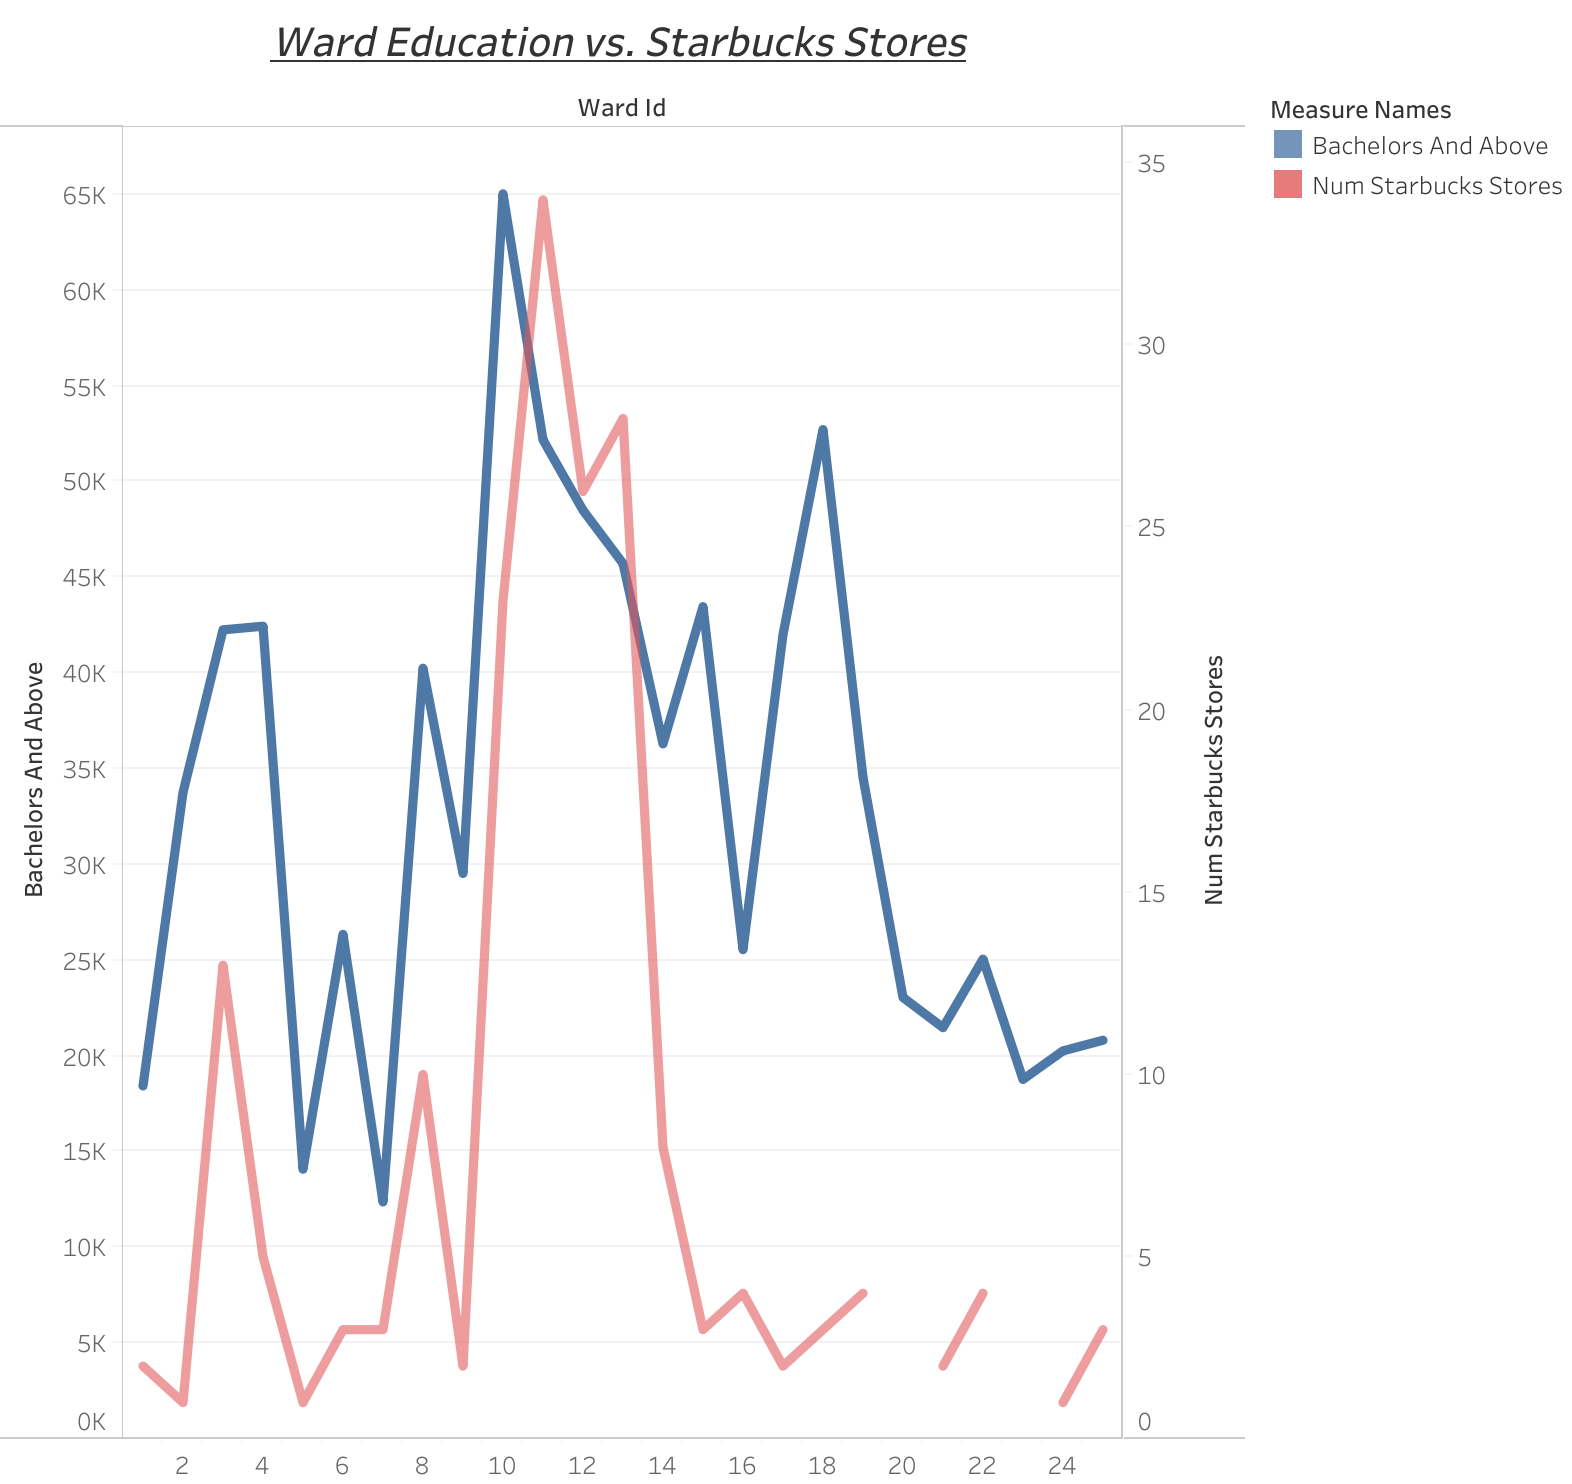

# 2. <u>`Household Income`</u>

In [547]:
# analyze household income of target wards

query = "SELECT ward_id, avg_total_household_income, median_total_household_income FROM ward_households ORDER BY avg_total_household_income DESC;"

df = pd.read_sql(query, mydb)

avg_income = df.avg_total_household_income
median_income = df.median_total_household_income

dumbbell_plot = px.scatter(df, 
                        x=['avg_total_household_income', 'median_total_household_income'],
                        y='ward_id',
                        labels={
                            'ward_id': 'Ward',
                            'variable': 'measure of central tendency'
                            },
                        title="Ward Household Income Mean vs. Median")

for i in range(df.shape[0]):
    dumbbell_plot.add_shape(
        type='line',
        x0=avg_income.iloc[i], y0=df.ward_id.iloc[i], 
        x1=median_income.iloc[i], y1=df.ward_id.iloc[i],
        line_color="#cccccc"
    )

dumbbell_plot.show()

/var/folders/jm/v10mymh16t92y4plqpb0x81w0000gn/T/ipykernel_22852/3622340205.py:5: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [548]:
bar_chart = px.bar(df,
                y='avg_total_household_income',
                x='ward_id',
                labels={'avg_total_household_income': 'Avg. Household Income',
                        'ward_id': 'Ward'},
                color='avg_total_household_income'
                )

bar_chart.update_traces(texttemplate='%{text:.2s}', textposition='outside')

bar_chart.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

bar_chart.show()


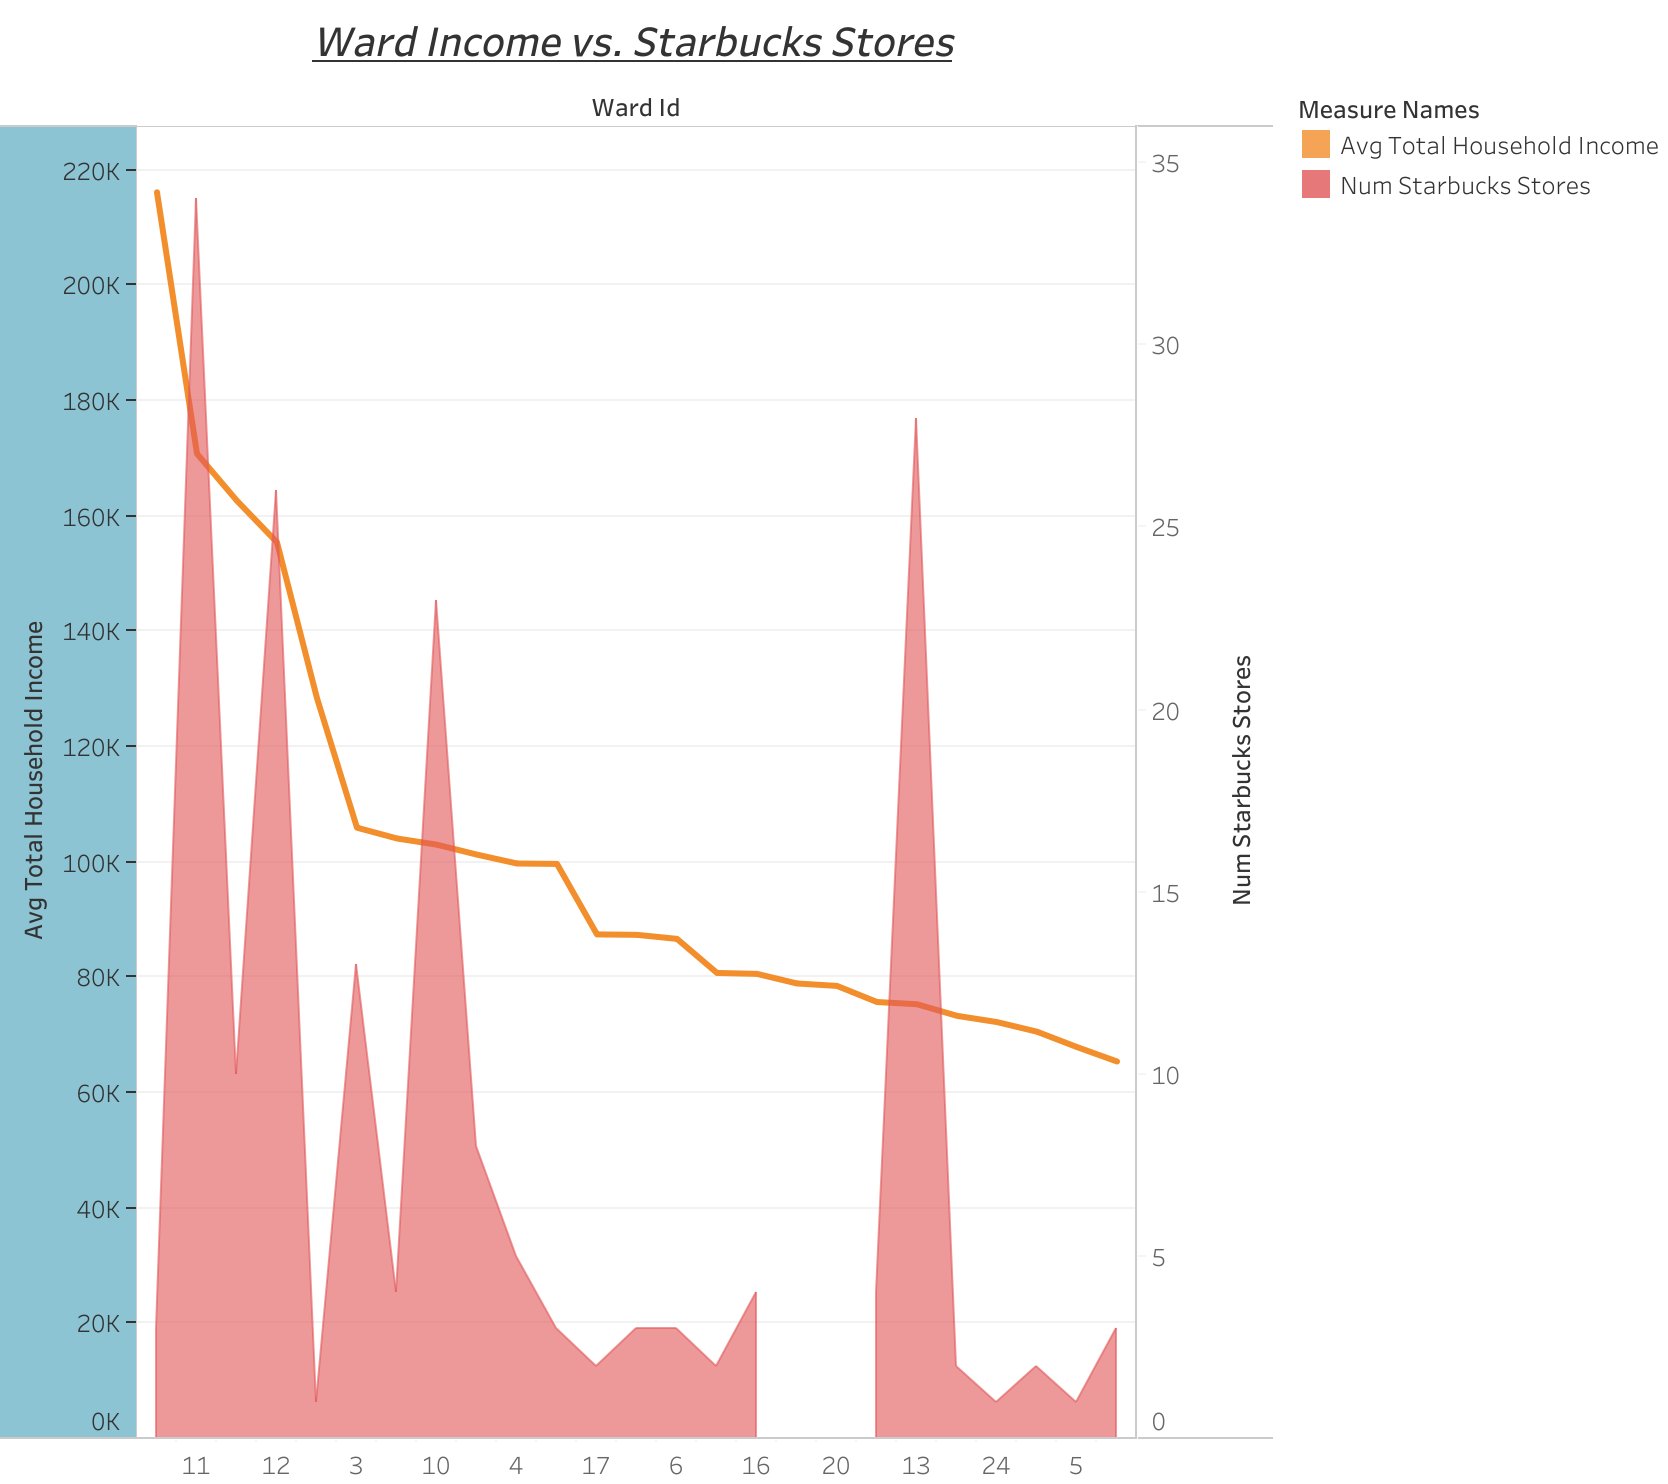

explain above dumbbell plot + heated bar graph

- How much do households in these wards make?
    - Very high avg total household income
        - *outlier: though similar in most other measures, avg household income in ward 13 is not par among the rest 3 (75k vs. 103k, 170k, 155k).
        - esp. interesting since wards 10-13 have 4 lowest avg household sizes yet have a higher avg total household income than most other wards.


### <em>`🕐 TABLEAU TIME`</em>

![Ward Income.png](<attachment:Ward Income.png>)

[From the left, Wards are sorted from highest to lowest household income. As you move further left in the graph, you find that households earn less, and Starbucks stores are rarer. Take note of the previously mentioned outlier Ward 13, which has the 2nd highest # Starbucks stores (28), but hosts the 6th lowest household income.]

<br />
<hr />
<br />

# 3. <u>`Unemployment`</u>

### <em>`🕐 TABLEAU TIME`</em>

![Ward Unemployment.png](<attachment:Ward Unemployment.png>)

[This graph reveals that you find more Starbucks stores as you travel into Wards with lower unemployment rates. It is important to note the weak proportional delta between the two; a high decline unemployment rate doesn't equate to a high incline in Starbucks stores. This makes sense, because had the unemployment rate dropped from 85 to 65, you're chances of running into a Starbucks in those Wards are slim to none. We do still find Starbucks stores spiking in Wards where unemployment is at its lowest in the entire city. This also holds on the opposite end of the spectrum since the fewest amount of Starbucks stores are found when unemployment is at its highest (Ward 24). The # stores fluctuates steadily < 5 until you reach an unemployment rate < 7.5%.]

<br />
<hr />
<br />
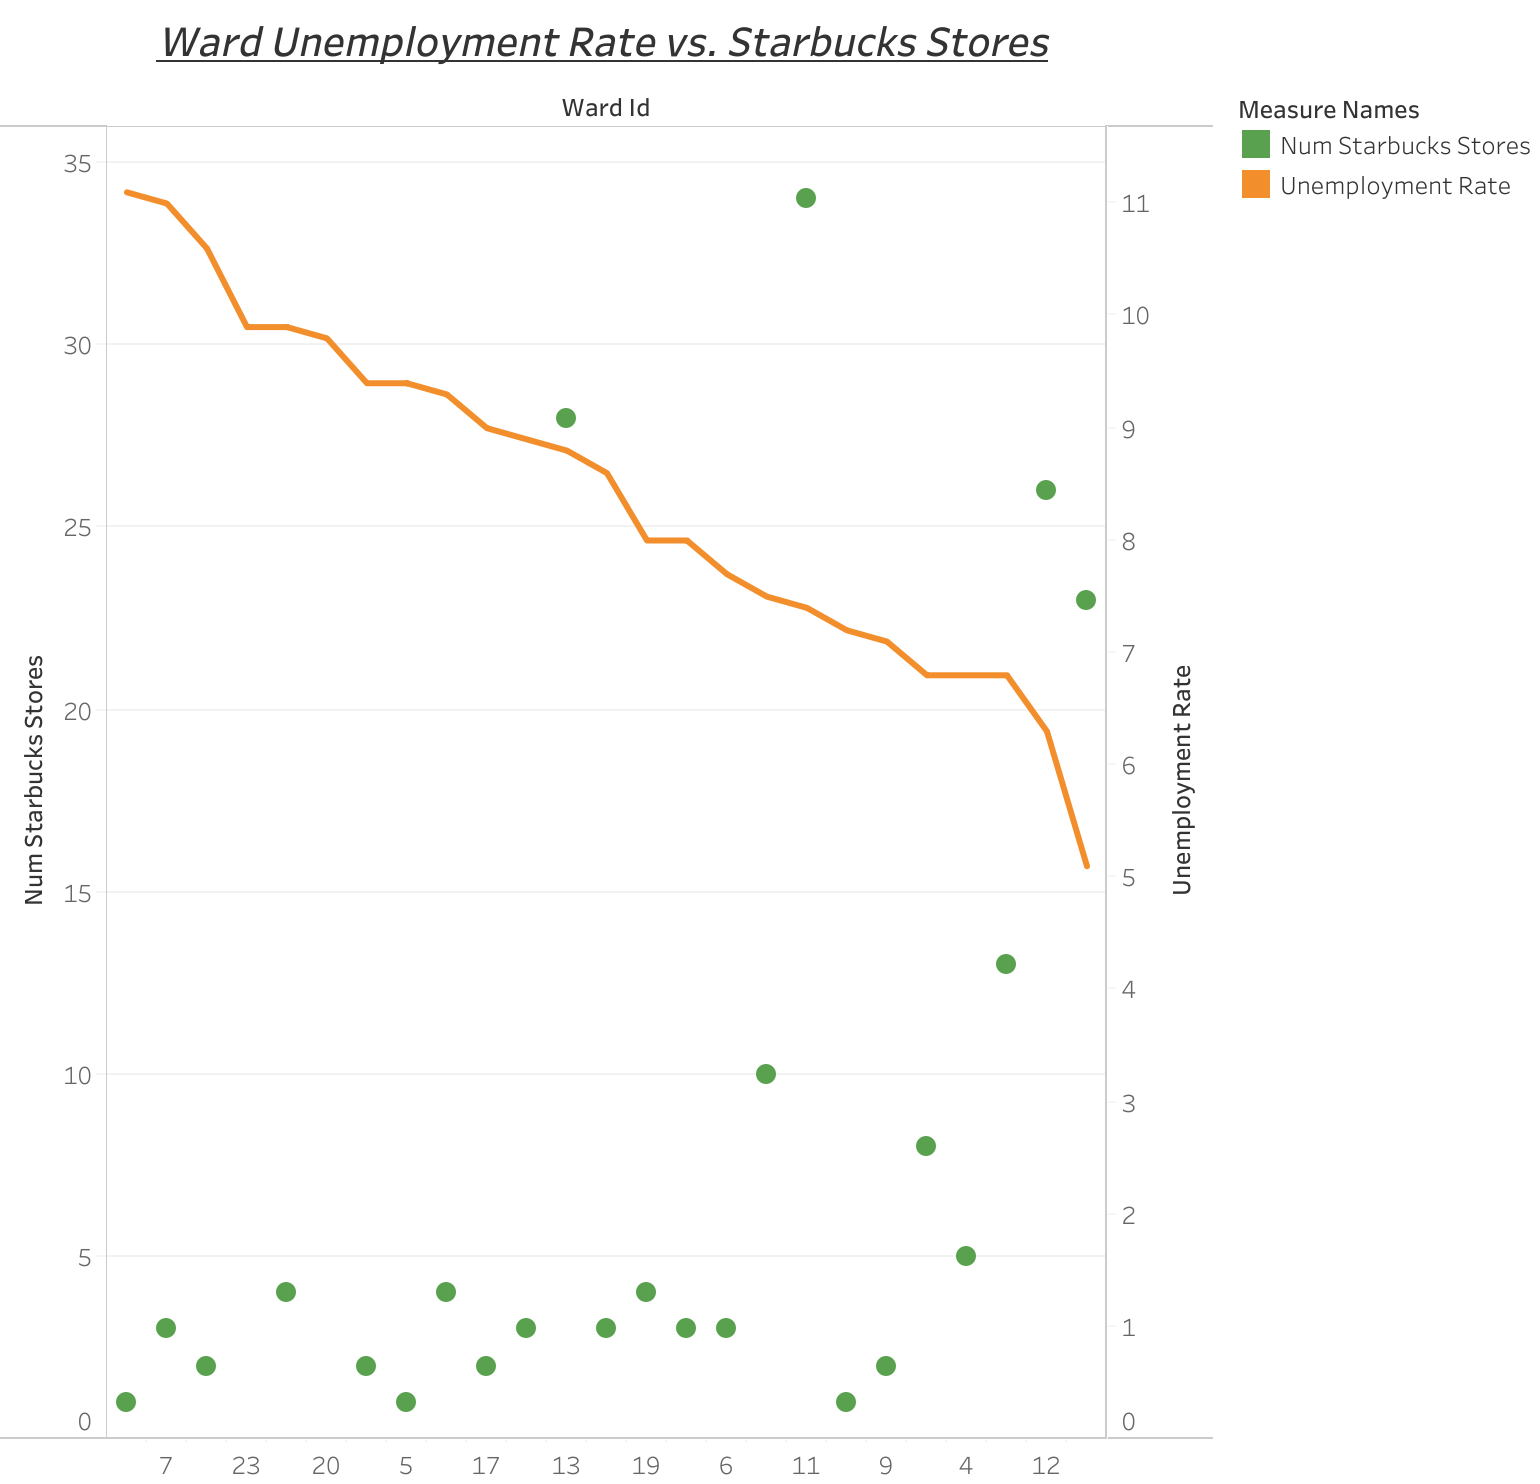

# 4. <u>`Workforce`</u>

### <em>`🕐 TABLEAU TIME`</em>

![Ward Workforce.png](<attachment:Ward Workforce.png>)

[Areas in Toronto often have an industry majority. For instance, Bay St. is famously known for being the Wall Street of the North and housing headquarters for the five main Canadian banks. In this same sense, Wards can also have a majority industry. The following graph reveals how there are more Starbucks stores in wards which especially have a high number of workers in Mgmt. of Companies/Enterprises (Enterprise Mgmt. Bros), Real Estate/Rental/Leasing (Real-Estate Bros), and Finance/Insurance (Finance Bros). This general fit in the incline of the # _ Bros and the # Starbucks stores is strong, despite the rough, fluctuating starts of all 3 industry lines.]

<br />
<hr />
<br />
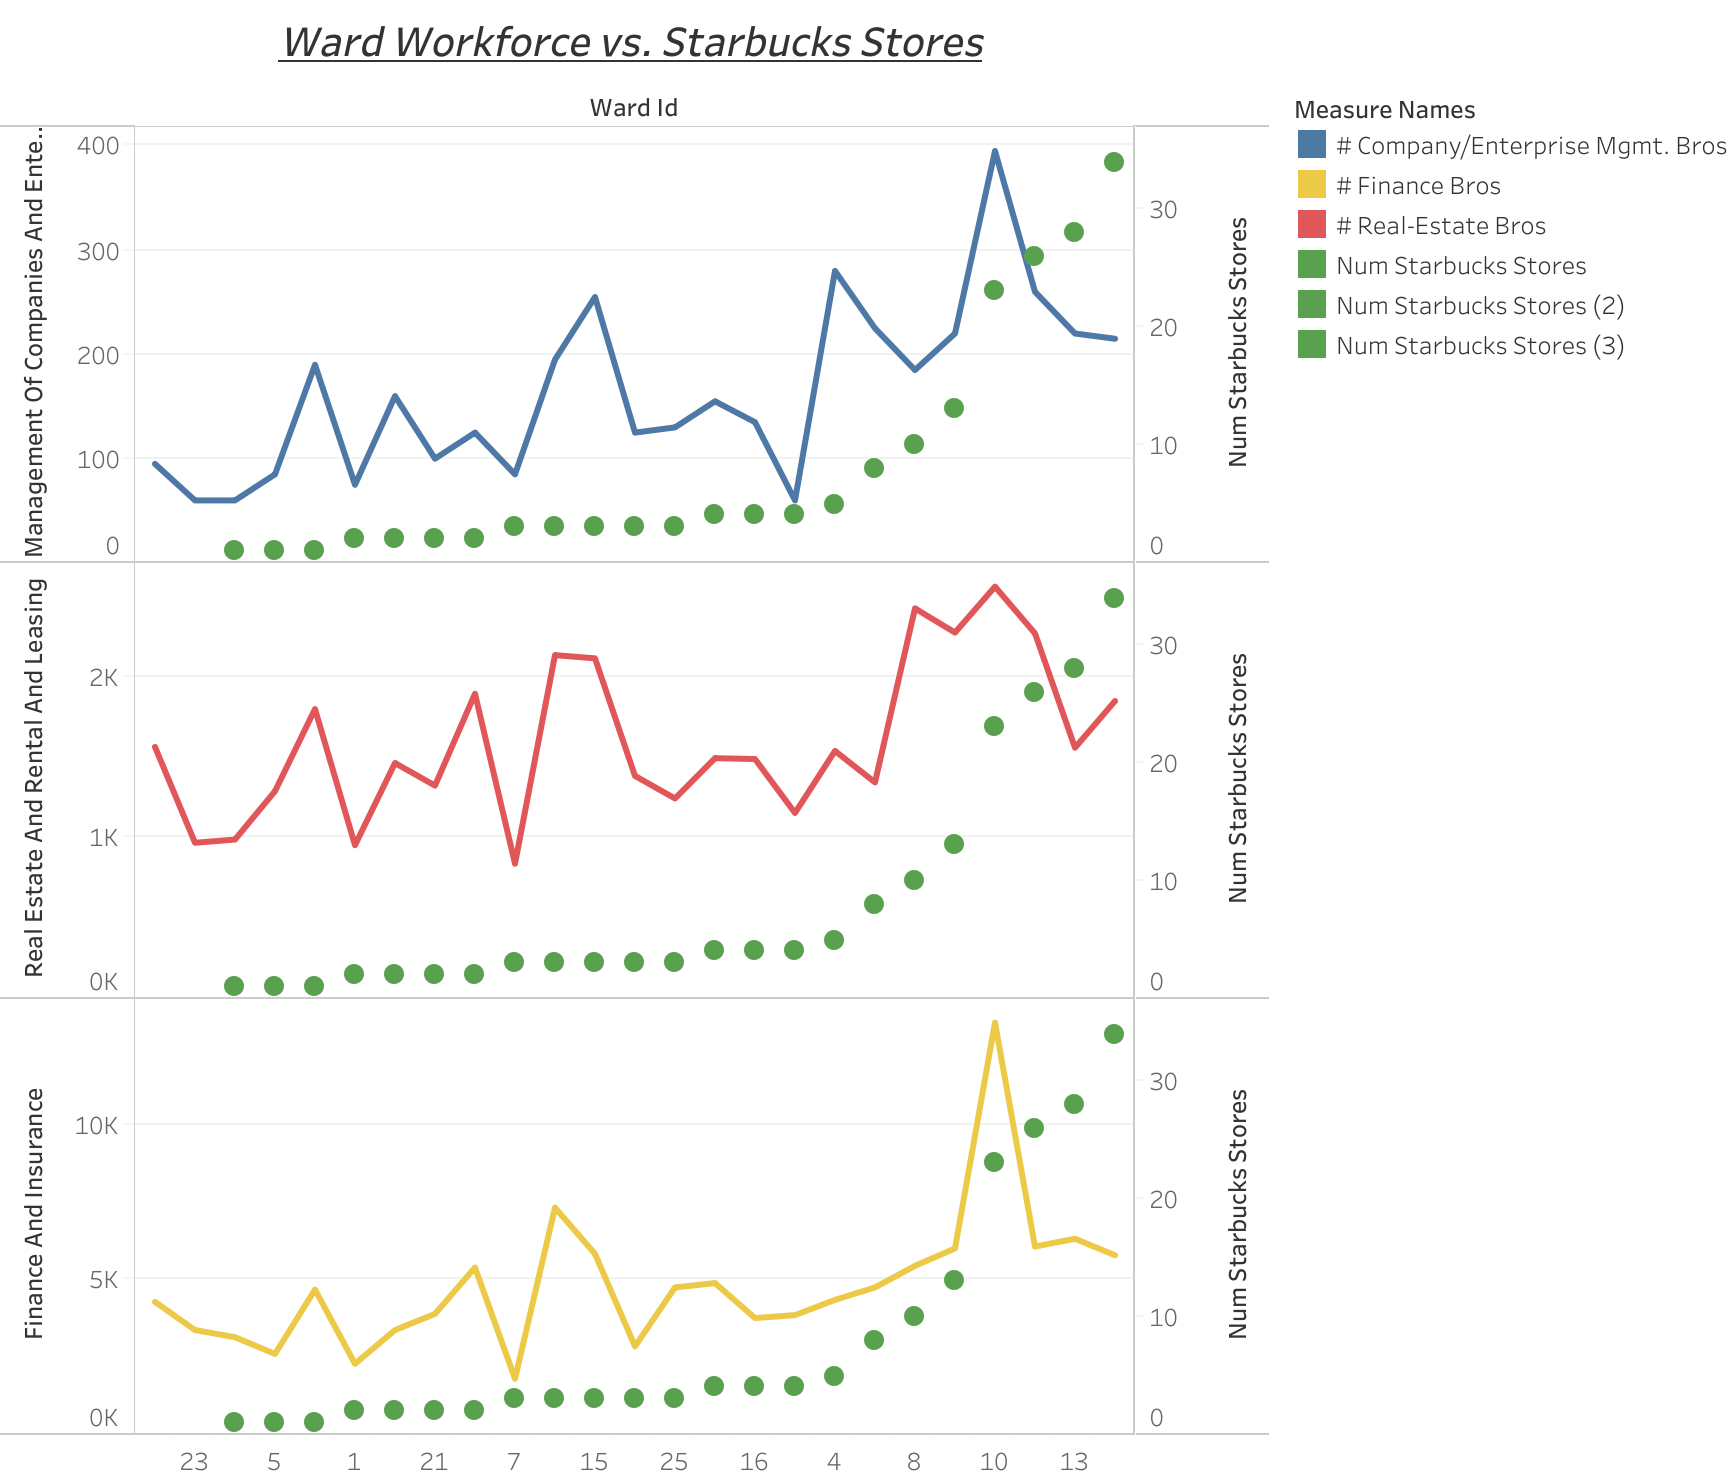

In [549]:
# close the mysql db connection

mydb.close()